# How to Perform Data Cleaning for Machine Learning with Python

## 1. Messy Datasets

>"*Data cleaning is used to refer to all kinds of tasks and activities to detect and repair errors in the data*."

Se utilizarán los datasets *Oil_Spill.csv* y *Iris_Flowers.csv*.

## 2. Identify Columns That Contain a Single Value

Las columnas que tienen un único valor para todas las filas no ofrecen ninguna información para el modelado, pues tienen varianza cero. Para detectarlas, se puede utilizar la función **unique()** de NumPy, que reporta el número de valores únicos en cada columna.

El siguiente ejemplo carga el dataset *Oil_Spill* que contiene 50 variables y resume el número de valores únicos en cada columna.

In [1]:
# summarize the number of unique values for each column using numpy
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
data = loadtxt(urlopen(path), delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
	print(i, len(unique(data[:, i])))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


La columna 22 solo tiene **1** valor único, por lo que debe ser eliminada. 

Esta detección se puede realizar también con la función **nunique()** de Pandas, como se muestra a continuación.

In [2]:
# summarize the number of unique values for each column using numpy
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
# summarize the number of unique values in each column
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


## 3. Delete Columns That Contain a Single Value

Eliminar columnas es sencillo utilizando NumPy o Pandas. Una forma de hacerlo es guardar todas las columnnas que tienen un *single value* y luego eliminarlo del *Pandas DataFrame* con la función **drop()**.

In [3]:
# delete columns with a single unique value
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[22]
(937, 49)


El ejemplo anterior carga el dataset, calcula el número de valores únicos para cada columna e identifica aquellas en donde solo hay 1 valor (en este caso, la columna 22). Luego de ser eliminada, se imprime de nuevo la dimensión del *DataFrame* para confirmar que se realizó correctamente la operación.

## 4. Consider Columns That Have Very Few Values

Cuando la varianza de alguna columna es casi cero, puede o no afectar el modelo predictivo; por ende, no se pueden eliminar sin antes tomar esto en consideración. 
Para señalar las columnas con pocos valores únicos, se puede calcular el porcentaje de valores únicos con respecto al total de filas en el dataset. Esto se puede hacer manualmente con NumPy:

In [4]:
# summarize the percentage of unique values for each column using numpy
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
data = loadtxt(urlopen(path), delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
	num = len(unique(data[:, i]))
	percentage = float(num) / data.shape[0] * 100
	print('%d, %d, %.1f%%' % (i, num, percentage))

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


Se puede actualizar el código para que muestre únicamente aquellas variables que tienen valores únicos menores al 1% del porcentaje total de filas.

In [5]:
# summarize the percentage of unique values for each column using numpy
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
data = loadtxt(urlopen(path), delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
	num = len(unique(data[:, i]))
	percentage = float(num) / data.shape[0] * 100
	if percentage < 1:
		print('%d, %d, %.1f%%' % (i, num, percentage))

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


Como se puede observar, 11 de las 50 variables tienen pocos valores únicos. Esto no quiere decir que deban eliminarse, sino que requieren más atención.

Si se desearan eliminar todas las columnas con valores únicos menores al 1% del total de filas, se puede realizar lo siguiente:

In [6]:
# delete columns where number of unique values is less than 1% of the rows
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


## 5. Remove Columns That Have A Low Variance

La clase **VarianceThreshold** de la librería **scikit** permite especificar el argumento *threshold*, que por defecto se encuentra en 0.0 . Este argumento se puede modificar con la función *fit_transform()*, para determinar un límite que se utilizará para eliminar todas las columnas que tengan una varianza menor a él. El siguiente código elimina las columnas con varianza menor a 0.0:

In [8]:
# example of apply the variance threshold
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(937, 49) (937,)
(937, 48)


Se puede definir una secuencia de *thresholds* desde 0.0 hasta 0.5, con un *step* de 0.05 . 

In [11]:
# example of apply the variance threshold
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)
# define thresholds to check
thresholds = [0.0, 0.55, 0.05]
# apply transform with each threshold
results = list()
for t in thresholds:
	# define the transform
	transform = VarianceThreshold(threshold=t)
	# transform the input data
	X_sel = transform.fit_transform(X)
	# determine the number of input features
	n_features = X_sel.shape[1]
	print('>Threshold=%.2f, Features=%d' % (t, n_features))
	# store the result
	results.append(n_features)

(937, 49) (937,)
(937, 48)
>Threshold=0.00, Features=48
>Threshold=0.55, Features=31
>Threshold=0.05, Features=37


Al unir todo esto y realizar un gráfico para observar los resultados, se tiene lo siguiente:

(937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


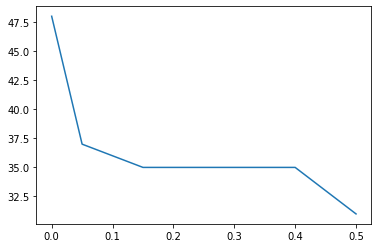

In [12]:
# explore the effect of the variance thresholds on the number of selected features
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
	# define the transform
	transform = VarianceThreshold(threshold=t)
	# transform the input data
	X_sel = transform.fit_transform(X)
	# determine the number of input features
	n_features = X_sel.shape[1]
	print('>Threshold=%.2f, Features=%d' % (t, n_features))
	# store the result
	results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

## 6. Identify Rows That Contain Duplicate Data

## ¿Qué aprendí?

## Fuentes
https://machinelearningmastery.com/basic-data-cleaning-for-machine-learning/